<h2> Using BOW </h2>

In [1]:
import pandas
import numpy as np

data = pandas.read_csv('preprocessed_data.csv')
data2 = pandas.read_csv("train_data.csv")

In [2]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [3]:
import re

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def preprocess_text(text_data):
    preprocessed_text = []
    for sentance in text_data:
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [4]:
preprocessed_titles = preprocess_text(data2['project_title'].values)

data['Title'] = preprocessed_titles

In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

X_train.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,Title
73288,la,mrs,grades_prek_2,16,literacy_language math_science,literature_writing mathematics,teaching something runs deep family my mom god...,790.96,close reading bins reading comprehension
14775,ok,mrs,grades_prek_2,1,math_science,mathematics,our classroom full young energetic eager learn...,119.95,bam boom bang reading super


<h3> Encoding School state </h3>

In [6]:
important_features = []
important_tfidf = []
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) 

X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
important_features.extend(vectorizer.get_feature_names())
important_tfidf.extend(vectorizer.get_feature_names())


After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3> Encoding Teacher Prefix </h3>

In [7]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) 


X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
important_features.extend(vectorizer.get_feature_names())
important_tfidf.extend(vectorizer.get_feature_names())


After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3> Encoding Project Grade Category </h3>

In [8]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
important_features.extend(vectorizer.get_feature_names())
important_tfidf.extend(vectorizer.get_feature_names())



After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3> Normalizing teacher_number_of_previously_posted_projects </h3>

In [9]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_number_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_number_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_number_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_number_norm = X_train_number_norm.reshape(-1,1)
X_cv_number_norm = X_cv_number_norm.reshape(-1,1)
X_test_number_norm = X_test_number_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_number_norm.shape, y_train.shape)
print(X_cv_number_norm.shape, y_cv.shape)
print(X_test_number_norm.shape, y_test.shape)
print("="*100)

important_features.extend(['teacher_number_of_previously_posted_projects'])
important_tfidf.extend(['teacher_number_of_previously_posted_projects'])


After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h3> Encoding clean_categories </h3>

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
X_train_clean_bow = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_bow = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_bow = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_bow.shape, y_train.shape)
print(X_cv_clean_bow.shape, y_cv.shape)
print(X_test_clean_bow.shape, y_test.shape)
print("="*100)
important_features.extend(vectorizer.get_feature_names())
important_tfidf.extend(vectorizer.get_feature_names())



After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)


<h3> Encoding Clean Subcategories </h3>

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_cleansub_bow = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_cleansub_bow = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cleansub_bow = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cleansub_bow.shape, y_train.shape)
print(X_cv_cleansub_bow.shape, y_cv.shape)
print(X_test_cleansub_bow.shape, y_test.shape)
print("="*100)
important_features.extend(vectorizer.get_feature_names())
important_tfidf.extend(vectorizer.get_feature_names())



After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)


<h3> Encoding Essay </h3>

In [12]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=6000)
vectorizer.fit(X_train['essay'].values)
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)
important_features.extend(vectorizer.get_feature_names())


After vectorizations
(49041, 6000) (49041,)
(24155, 6000) (24155,)
(36052, 6000) (36052,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=6000)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)
important_tfidf.extend(vectorizer.get_feature_names())


After vectorizations
(49041, 6000) (49041,)
(24155, 6000) (24155,)
(36052, 6000) (36052,)


<h3> Normalizing Price </h3>

In [14]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)
important_features.extend(['price'])
important_tfidf.extend(['price'])




After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


<h3> Encoding Titles </h3>

In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['Title'].values)
X_train_title_bow = vectorizer.transform(X_train['Title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['Title'].values)
X_test_title_bow = vectorizer.transform(X_test['Title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)
important_features.extend(vectorizer.get_feature_names())
important_tfidf.extend(vectorizer.get_feature_names())

After vectorizations
(49041, 11622) (49041,)
(24155, 11622) (24155,)
(36052, 11622) (36052,)


<h3> Merging all the data together </h3>

In [16]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_number_norm, X_train_clean_bow, X_train_cleansub_bow,X_train_title_bow)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_number_norm, X_cv_clean_bow, X_cv_cleansub_bow,X_cv_title_bow)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_number_norm, X_test_clean_bow, X_test_cleansub_bow,X_test_title_bow)).tocsr()
print("Final Data matrix")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)
print(len(important_features))



Final Data matrix
(49041, 17723) (49041,)
(24155, 17723) (24155,)
(36052, 17723) (36052,)
17723


In [17]:
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_number_norm, X_train_clean_bow, X_train_cleansub_bow,X_train_title_bow)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_number_norm, X_cv_clean_bow, X_cv_cleansub_bow,X_cv_title_bow)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_number_norm, X_test_clean_bow, X_test_cleansub_bow,X_test_title_bow)).tocsr()
print("Final Data matrix")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)
print(len(important_tfidf))

Final Data matrix
(49041, 17723) (49041,)
(24155, 17723) (24155,)
(36052, 17723) (36052,)
17723


<h3> Using loop method for Hyper-parameter tuning </h3>

In [18]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [19]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm



train_auc = []
cv_auc = []
hyperparameter=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

for i in tqdm(hyperparameter):
    algo = MultinomialNB(alpha=i,class_prior = [0.5,0.5])
    algo.fit(X_tr_bow, y_train)

    y_train_pred = batch_predict(algo, X_tr_bow)    
    y_cv_pred = batch_predict(algo, X_cr_bow)       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(np.log2(hyperparameter), train_auc, label='Train AUC')
plt.plot(np.log2(hyperparameter), cv_auc, label='CV AUC')

plt.scatter(np.log2(hyperparameter), train_auc, label='Train AUC points')
plt.scatter(np.log2(hyperparameter), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

100%|██████████| 14/14 [00:03<00:00,  3.90it/s]


<Figure size 640x480 with 1 Axes>

<h3> Using Multinomial Naive Bayes </h3>

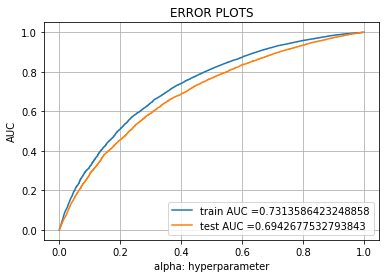

In [20]:
best_alpha = 10
from sklearn.metrics import roc_curve, auc



algo = MultinomialNB(alpha=best_alpha)
algo.fit(X_tr_bow, y_train)


y_train_pred = batch_predict(algo, X_tr_bow)    
y_test_pred = batch_predict(algo, X_te_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h3> Confusion Matrix </h3>


the maximum value of tpr*(1-fpr) 0.45384377894411854 for threshold 1.0
Train confusion matrix


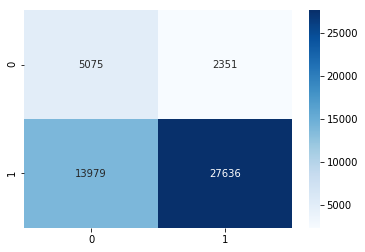

In [21]:
import numpy as np
import seaborn as sns
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm = confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t))
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

Test confusion matrix


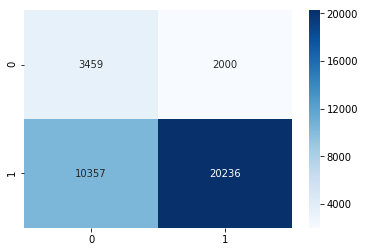

In [22]:
print("Test confusion matrix")
cm2 = confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t))
sns.heatmap(cm2, annot=True,fmt="d",cmap='Blues')

<h3> Printing top features </h3>

In [23]:
top=algo.feature_log_prob_
print(top.shape)
index=top[1].argsort()
index2 = top[0].argsort()

index=index[-20:]
index2=index2[-20:]


print("Important features for approving projects are:")
count=0
for i in index:    
    print(count+1,important_features[i])
    count=count+1
    
print("-"*50)

print("Important features for  not approving projects are:")
count=0
for i in index2:    
    print(count+1,important_features[i])
    count=count+1

(2, 17723)
Important features for approving projects are:
1 cook
2 life ready
3 title school means
4 properly
5 we school
6 muscles
7 variety books
8 movies
9 love use
10 grasp
11 jump ropes
12 minutes day
13 technology students
14 necessities
15 take care
16 certainly
17 language development
18 microscopes
19 represented
20 spread
--------------------------------------------------
Important features for  not approving projects are:
1 life ready
2 properly
3 000
4 classroom every day
5 we school
6 muscles
7 variety books
8 love use
9 movies
10 take care
11 minutes day
12 grasp
13 technology students
14 jump ropes
15 necessities
16 certainly
17 microscopes
18 language development
19 represented
20 spread


<h2> TFIDF </h2>

100%|██████████| 14/14 [00:03<00:00,  3.84it/s]


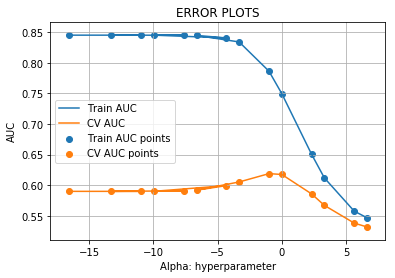

In [24]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from tqdm import tqdm



train_auc = []
cv_auc = []
hyperparameter=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

for i in tqdm(hyperparameter):
    algo = MultinomialNB(alpha=i,class_prior = [0.5,0.5])
    algo.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(algo, X_tr_tfidf)    
    y_cv_pred = batch_predict(algo, X_cr_tfidf)       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(np.log2(hyperparameter), train_auc, label='Train AUC')
plt.plot(np.log2(hyperparameter), cv_auc, label='CV AUC')

plt.scatter(np.log2(hyperparameter), train_auc, label='Train AUC points')
plt.scatter(np.log2(hyperparameter), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

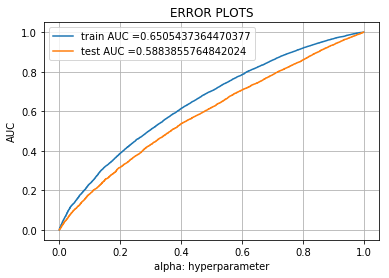

In [25]:
best_alpha = 5
from sklearn.metrics import roc_curve, auc



algo = MultinomialNB(alpha=best_alpha)
algo.fit(X_tr_tfidf, y_train)


y_train_pred = batch_predict(algo, X_tr_tfidf)    
y_test_pred = batch_predict(algo, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h2>Confusion Matrix </h2> 

the maximum value of tpr*(1-fpr) 0.3685941329435411 for threshold 0.995
Train confusion matrix


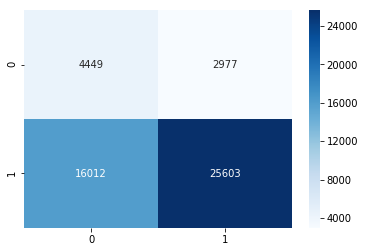

In [26]:
import numpy as np
import seaborn as sns
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
cm = confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t))
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

Test confusion matrix


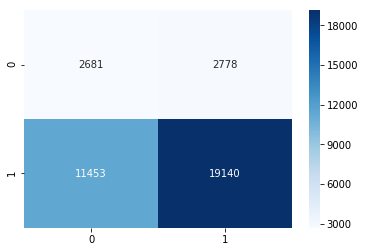

In [27]:
print("Test confusion matrix")
cm2 = confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t))
sns.heatmap(cm2, annot=True,fmt="d",cmap='Blues')

<h2> Printing Top Features </h2>

In [28]:

top=algo.feature_log_prob_

index=top[1].argsort()

index2 = top[0].argsort()


index=index[-20:]
index2 = index2[-20:]
print("Important features are:")
count=0
for i in index:
    
    print(count,important_features[i])
    count=count+1
    
print("-"*50)
print("Negative  features are:")
count=0
for j in index2:
    
    print(count,important_features[j])
    count=count+1

Important features are:
0 years come
1 year old
2 year teacher
3 young learners
4 year they
5 spread
6 your generous donation
7 years
8 year want
9 world my students
10 year students
11 young students
12 younger
13 young people
14 year school
15 year olds
16 year year
17 year teaching
18 year would
19 year old students
--------------------------------------------------
Negative  features are:
0 yearbook
1 year old
2 year teacher
3 years come
4 spread
5 year they
6 world my students
7 year want
8 your generous donation
9 years
10 year students
11 young students
12 younger
13 young people
14 year school
15 year olds
16 year year
17 year teaching
18 year would
19 year old students


In [29]:
table = pandas.DataFrame({
    "Vectorizer":['BOW','TFIDF'],
    "Model":["MultiNomialNB","MultiNomialNB"],
    "Hyperparameter":[10,5],
    "AUC":[0.68,0.58],
    
})
table

,Vectorizer,Model,Hyperparameter,AUC
0,BOW,MultiNomialNB,10,0.68
1,TFIDF,MultiNomialNB,5,0.58
